In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rcParams.update({
    "text.usetex": True,
    "mathtext.fallback":'stix'
})



In [3]:
result = np.load('adversarial_conversion_score.npy', allow_pickle=True).item()

In [4]:
datasets = ['IDRID', 'MESSIDOR', 'DDR', 'RETINAL_LESIONS', 'FGADR']

confMat = np.zeros((len(datasets), len(datasets)))
for i, d1 in enumerate(datasets):
    for j, d2 in enumerate(datasets):
        
        c = result[(d1, d2)][1]
        c = c[1:, 1:].numpy()
        inter = np.diag(c)
        union = np.sum(c, 0) + np.sum(c, 1) - inter
        iou = inter/union
        confMat[i, j] = iou.mean()

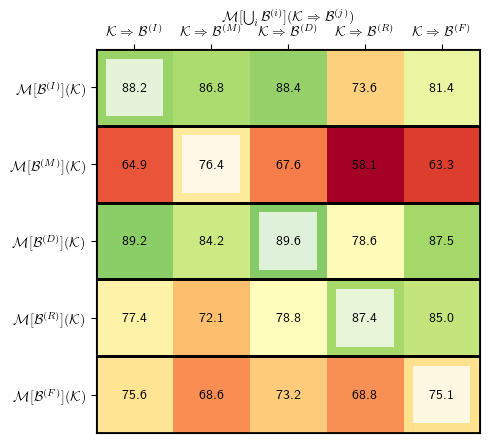

In [6]:
ax = plt.subplot()



ax.imshow(confMat, cmap=cm.RdYlGn, interpolation='none', vmin=confMat.min(), vmax=1)

for (i, j), z in np.ndenumerate(confMat):
    ax.text(j, i, '{:0.1%}'.format(z), ha='center', va='center')
    if i==j:
        # rectangle = plt.Rectangle((j-.5,i-.5), 1, 1, fc='None', ec="white", linewidth=2, alpha=1)
        # ax.add_patch(rectangle)
        rectangle = plt.Rectangle((-0.5,i-.5), 5, 1, fc='None', ec="black", linewidth=2, alpha=1)
        ax.add_patch(rectangle)
        
        
        rectangle = plt.Rectangle((j-0.75/2,i-0.75/2), 0.75, 0.75, fc='white', linewidth=4, alpha=0.75)
        ax.add_patch(rectangle)

labels = ['I', 'M', 'D', 'R', 'F']

plt.xlabel(r'$\mathcal{M}[\bigcup_i \mathcal{B}^{(i)}](\mathcal{K} \Rightarrow \mathcal{B}^{(j)})$') 
plt.xticks(np.arange(5), labels=[r'$\mathcal{K} \Rightarrow \mathcal{B}^{('+str(i)+r')}$' for i in labels])
plt.yticks(np.arange(5), labels=[r'$\mathcal{M}[\mathcal{B}^{('+str(i)+')}](\mathcal{K})$' for i in labels])

fig = plt.gcf()
fig.set_size_inches((5, 5))
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_ticks_position('top')

ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.savefig('validation_conversion.png', dpi=300)

plt.show()